<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [3]:

binomial_p(n,k,p) = ((factorial(n))./((factorial(k)).*(factorial(n .- k)))).*(p.^k).*((1-p).^(n-k))
    

binomial_p (generic function with 1 method)

In [40]:
binomial_p(10, 2, 0.4) = 0.12093235199999998

LoadError: syntax: "10" is not a valid function argument name around In[40]:1

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [7]:
k = 5
n = 10
p = 0.4

win = binomial_p(n,k,p)

0.20065812480000003

The chance of losing the bet:

In [48]:
k = collect([0,1,2,3,4,6,7,8,9,10])
n = 10
p = 0.4

i = 0
for a in k
    lose = binomial_p(n,a,p)
    i = i + lose
end

println(i)
i + win

0.7993418752


1.0

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [ ]:
You would expect yourself to lose money since the coin itself is unfair, the expected outcome is negative. 

In [51]:
(-10 .* i) + (30 .* win)

-1.973675007999999

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [54]:
k = 4
n = 10
p = 0.4

win = binomial_p(n,k,p)
lose = 1- win

println(win)
println(lose)

0.250822656
0.749177344


In [55]:
(-10 .* lose) + (30 .* win)

0.03290623999999909

In [ ]:
Since the expected outcome is positive, you could expect to earn money but not a lot. 

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [38]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [81]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [69]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [66]:
fit_coeff = Polynomials.fit(x,y_observed,1)
coef = Polynomials.coeffs(fit_coeff)

2-element Vector{Float64}:
 -2.656448449290994
  3.1110422768566512

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [93]:
chisqr(b,m,x,y_observed,sigma) = sum(((y_observed .- ((m.*x).+ b)).^2)./(sigma.^2))

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [94]:
chi2_list = []

for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    fit_coeff = Polynomials.fit(x,y_observed,1)
    coef = Polynomials.coeffs(fit_coeff)
    a = chisqr(coef[1],coef[2],x,y_observed,sigma)
    push!(chi2_list, a)
end


### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [95]:
using Statistics
mean(chi2_list)

8.997798328063242

The degree of freedom is to be expected since the mean of chi squared should be the number of data points minus the number of coefficients. 

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

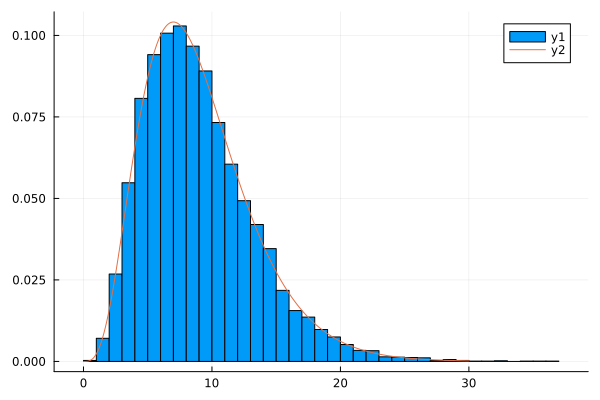

In [104]:
x_dist=0:0.1:30
chi2 = di.Chisq(9)
Plots.histogram(chi2_list, bin=50, normalize = true)
Plots.plot!(x_dist,di.pdf.(di.Chisq(9),x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [105]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

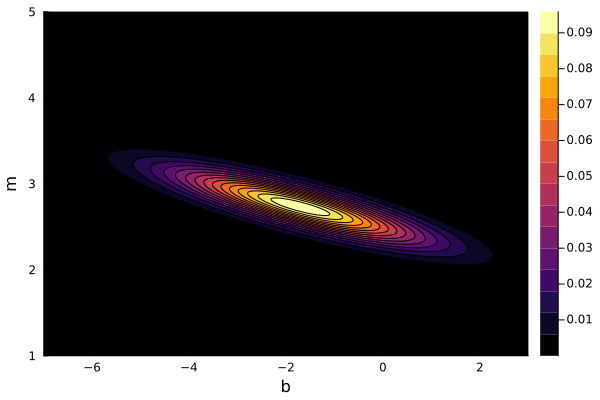

In [108]:
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

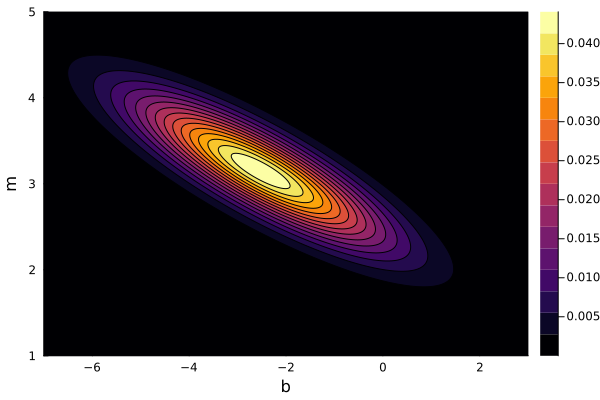

In [109]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

The plot is wider vertically compared to the graph in 2.6 and is more tilted diagonally. Since the x is defined from 0 to 5 instead of 0 to 10, it would make sense that the circles would be more wide as m is more sensitive noise which results from changes in x. 

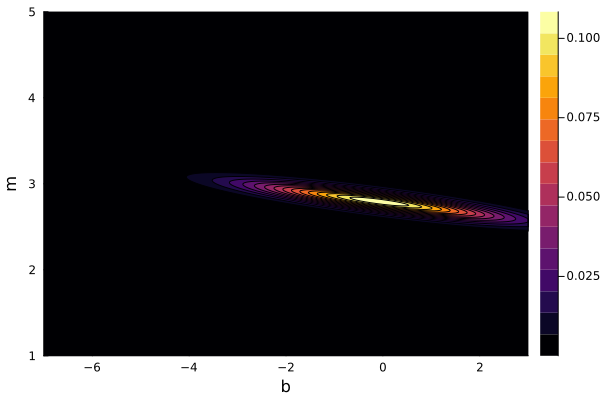

In [110]:
x = 0:2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

The graph is thinner vertically. This is because the x range is bigger, from 0 to 20 instead of 0 to 10 and therefore would result in a skinner circle. This is due to the same reason as above. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

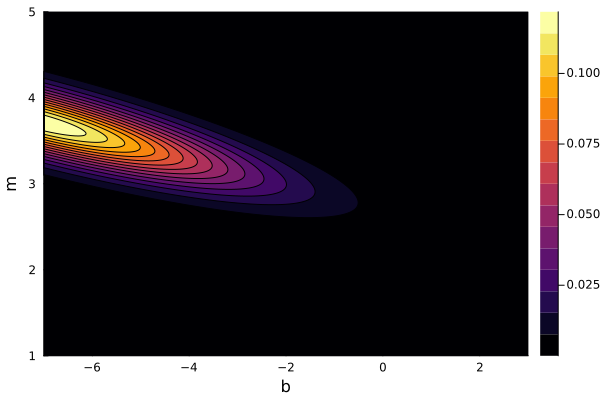

In [111]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

The graph is very wise horizontally, indicating that b experiences a higher sensitivity to noise when there is a change in sigma. The bigger the sigma the bigger the range of b.

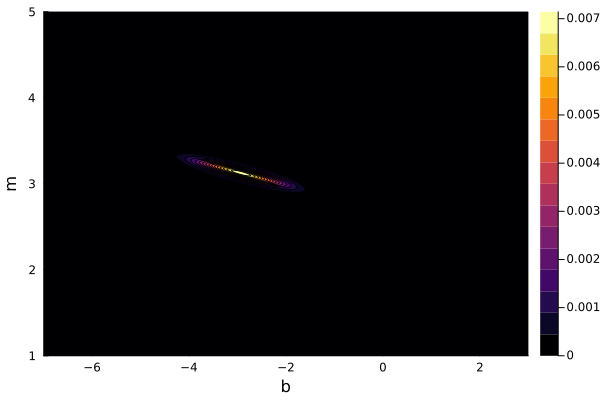

In [112]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3
Plots.contourf(b_range,m_range,p_chi2poly,xlabel = "b", ylabel = "m")

The graph is very narrow horizontally, indicating that b experiences a higher sensitivity to noise when there is a change in sigma. The smaller the sigma the smaller the range of b.